Фитнес-центр работает над способами взаимодействия с клиентами на основе аналитических данных. <br>
Основная проблема - отток клиентов.<br>Для фитнес-центра будем считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал.<br>
Чтобы прогнозировать отток, отдел по работе с клиентами  перевёл в электронный вид анкеты. Задача — провести анализ и подготовить план действий по удержанию клиентов:<br>
    прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;<br>
    выделить несколько групп и охарактеризовать их основные свойства;<br>
    проанализировать признаки, наиболее сильно влияющие на отток;<br>
    сформулировать выводы и дать рекомендации по повышению качества работы с клиентами:<br>
        1) выделить целевые группы клиентов;<br>
        2) предложить меры по снижению оттока;<br>
        3) определить другие особенности взаимодействия с клиентами.<br>

### Шаг 1

In [1]:
import pandas as pd

In [2]:
gym_churn=pd.read_csv('/datasets/gym_churn.csv')

In [3]:
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Загрузили данные успешно, в след. этапе посмотрим нет ли пропущенных значений

### Шаг 2

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Пропущенных значений нет

In [6]:
gym_churn.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [7]:
gym_churn.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


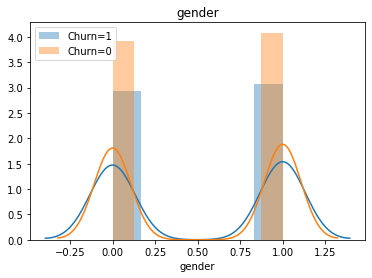

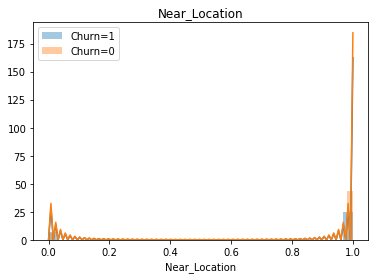

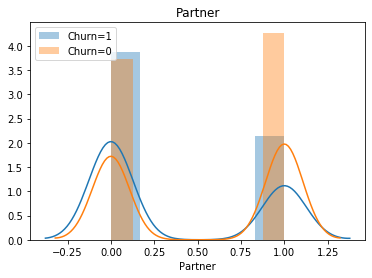

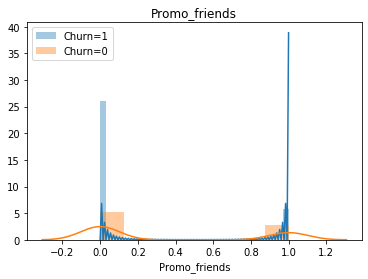

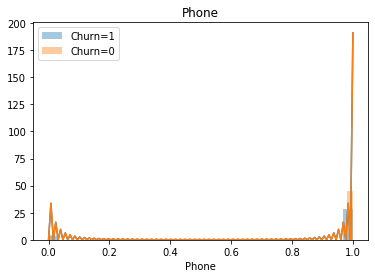

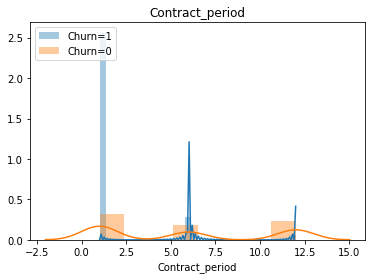

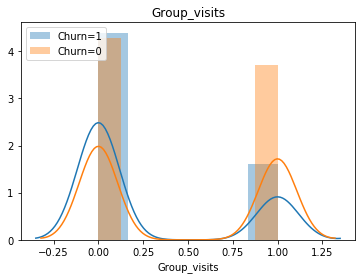

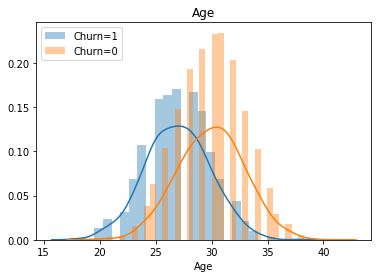

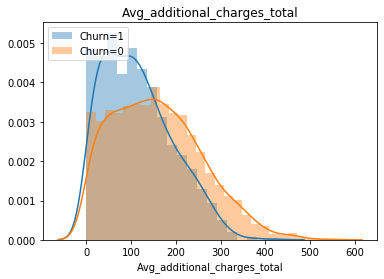

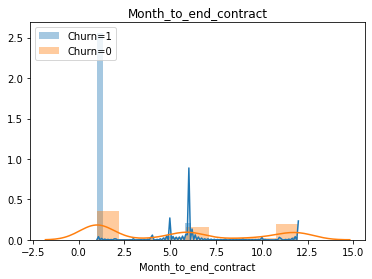

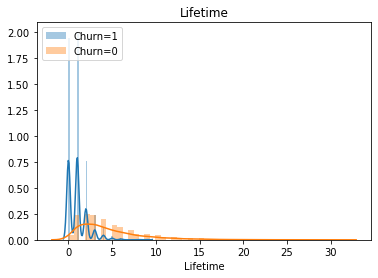

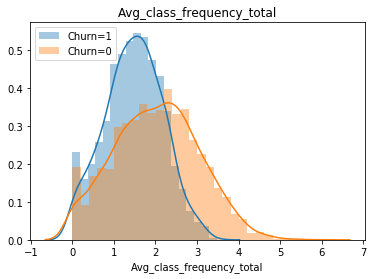

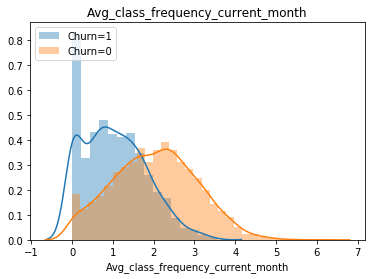

In [8]:
for column in gym_churn.drop(['Churn'],axis=1).columns:
    ax=sns.distplot(gym_churn.query('Churn == "1"')[column]).set_title(column)
    ax=sns.distplot(gym_churn.query('Churn == "0"')[column]).set_title(column)
    legend=['Churn=1','Churn=0']
    plt.legend(legend,loc=2)
    plt.show()

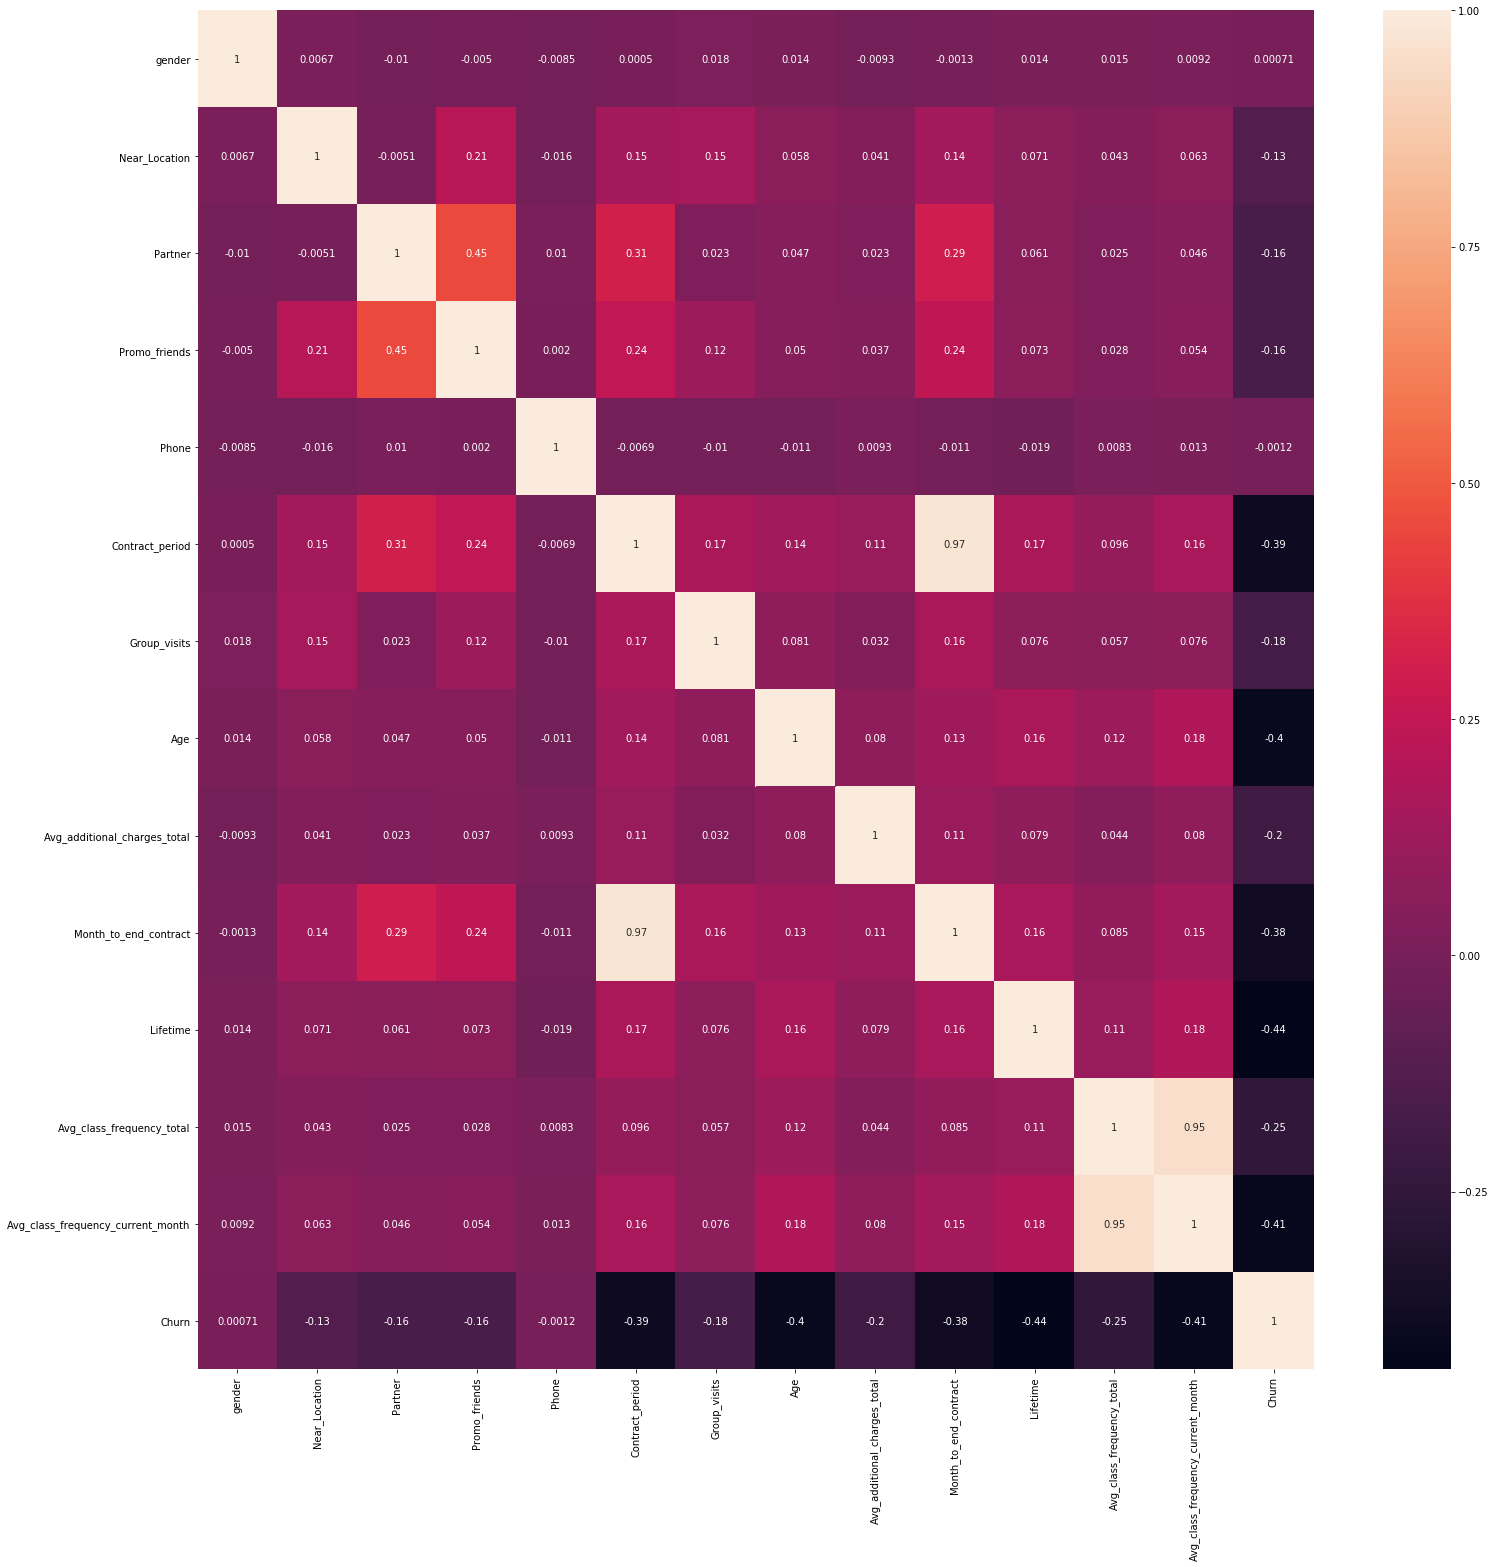

In [9]:
corr_m = gym_churn.corr()
plt.figure(figsize = (25,25))
sns.heatmap(corr_m, annot = True)
plt.show()

### Вывод

Наблюдаются следующие различия:<br>
1) наличие сотрудничества с компанией клиента снижает вероятность его оттока;<br>
2) чаще всего перестают ходить люди с минимальным контрактом;<br>
3) групповые визиты снижают вероятность оттока;<br>
4) молодые клиенты более склонны к оттоку;<br>
5) те, кто ходят чаще, менее склонны к оттоку.<br>

### Шаг 3

In [10]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [11]:
def print_all_metrics(y_true, y_pred, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [12]:
X = gym_churn.drop('Churn', axis = 1)
y = gym_churn['Churn']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [15]:
model_lr = LogisticRegression(solver='lbfgs')
model_lr.fit(X_train_st,y_train)
predictions_lr = model_lr.predict(X_test_st)
probabilities_lr = model_lr.predict_proba(X_test_st)[:,1]
print_all_metrics(y_test,predictions_lr)

Метрики классификации
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83


In [16]:
rf_model = RandomForestClassifier(n_estimators = 100,random_state=0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
print_all_metrics(y_test,rf_predictions)

Метрики классификации
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


Логистическая регрессия показала себя немного лучше.

### Шаг 4

In [17]:
import numpy as np

In [18]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage


In [19]:
x_sc = scaler.fit_transform(X)
linked = linkage(x_sc, method = 'ward')

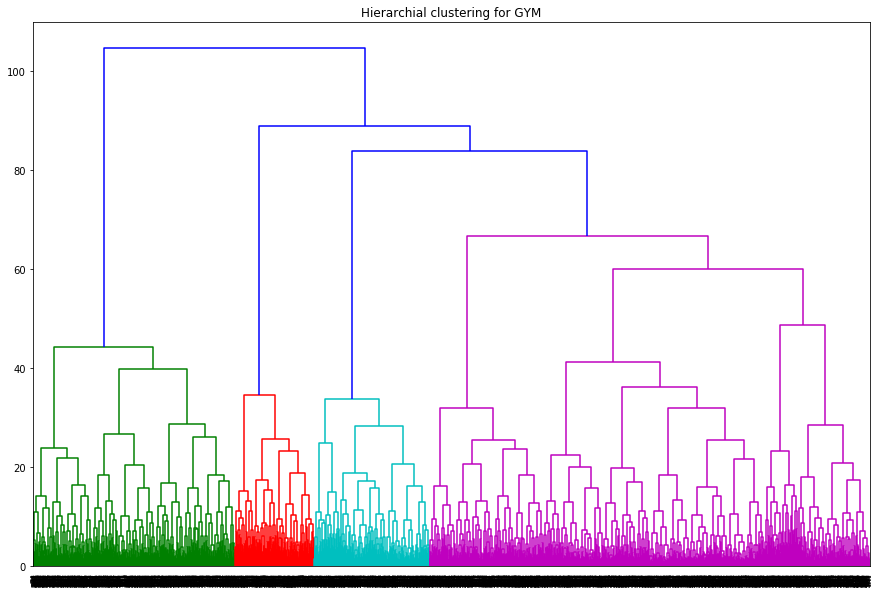

In [20]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

Оптимальное количество кластеров - 4.

In [21]:
km = KMeans(n_clusters = 4)
labels = km.fit_predict(x_sc)
gym_churn['cluster_km'] = labels

In [22]:
gym_churn.groupby('cluster_km').mean().sort_values(by='Churn',ascending=False)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
2,0.486744,0.759347,0.382733,0.191706,1.0,1.893950,0.292998,28.027192,129.583082,1.800816,2.221618,1.202165,0.947606,0.562882
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
3,0.544769,0.860509,0.339303,0.200754,1.0,2.387370,0.448633,30.020735,157.568974,2.225259,4.714420,2.711902,2.698564,0.092366
1,0.503697,0.940850,0.778189,0.573937,1.0,10.685767,0.533272,29.896488,161.102734,9.756932,4.720887,1.991351,1.983043,0.029575


В кластерах, склонных к оттоку, чаще не пользуются групповыми визитами, тратят немного меньше на доп. услуги, реже посещают, а в последний месяц посещают еще меньше. <br>Чем ближе lifetime к 5 месяцам - тем меньше вероятность оттока. 

In [23]:
def distplot_with_hue(data=None, x=None, hue=None, row=None, col=None, legend=True, **kwargs):
    _, bins = np.histogram(data[x].dropna())
    g = sns.FacetGrid(data, hue=hue, row=row, col=col,size=5)
    g.map(sns.distplot, x, **kwargs)
    if legend and (hue is not None) and (hue not in [x, row, col]):
        g.add_legend(title=hue) 

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


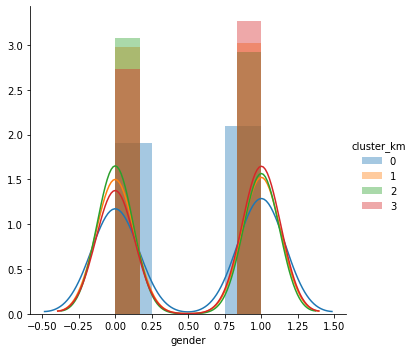

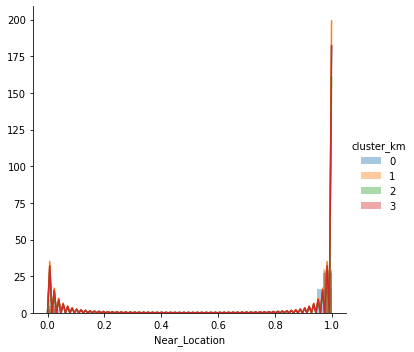

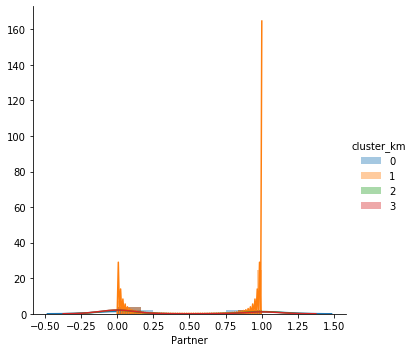

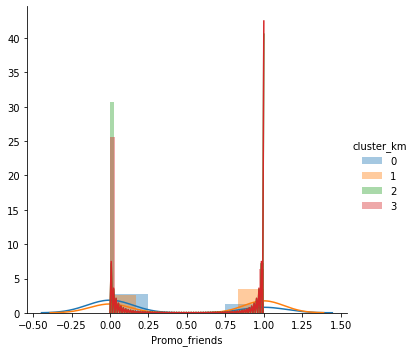

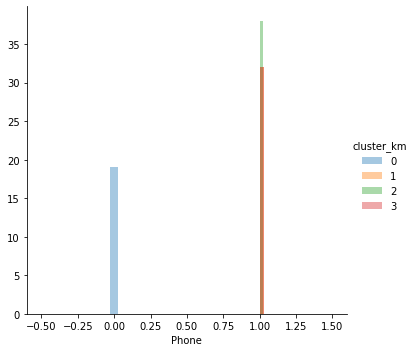

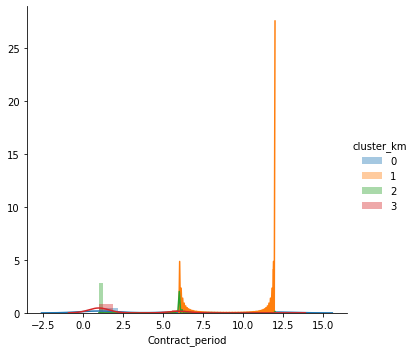

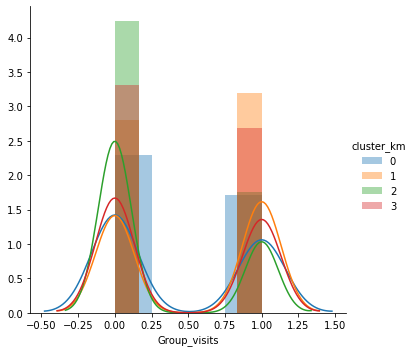

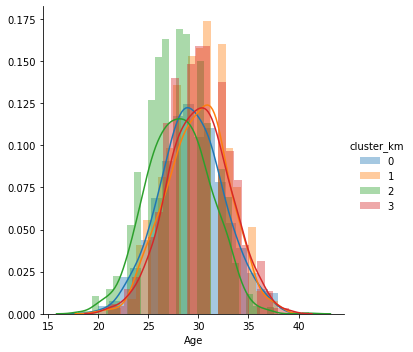

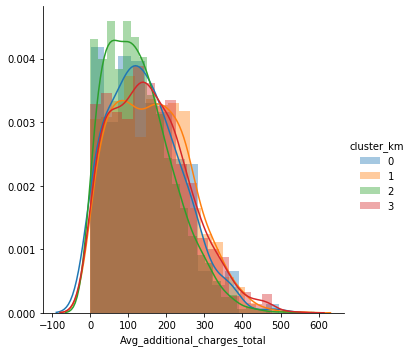

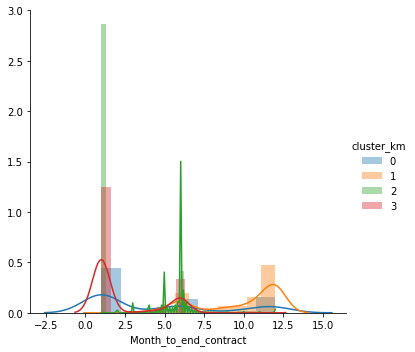

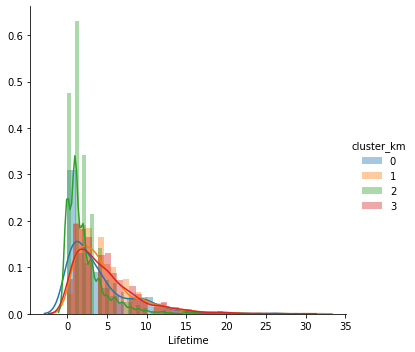

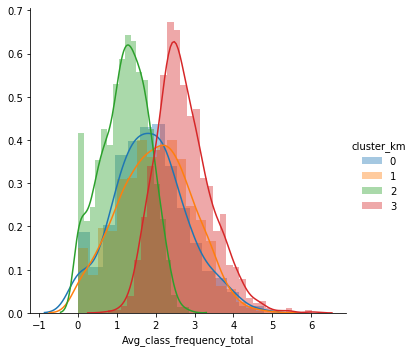

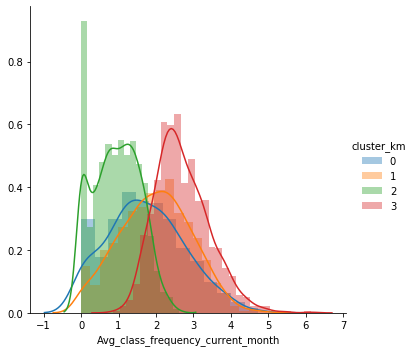

In [24]:
for column in gym_churn.drop(['Churn','cluster_km'],axis=1).columns:
    distplot_with_hue(gym_churn,x=column,hue='cluster_km')

In [25]:
gym_churn.groupby('cluster_km')['Churn'].mean().sort_values(ascending=False)

cluster_km
2    0.562882
0    0.266839
3    0.092366
1    0.029575
Name: Churn, dtype: float64

Кластеры 0 и 2 более склонны к оттоку.

### Шаг 5.

Стратегия по уменьшению оттока:<br>
1) предлагать групповые занятия<br>
2) предлагать допольнительные услуги - это может удержать клиента;<br>
3) оказывать дополнительное внимание тем клиентам, которые в последний месяц контракта совсем не ходят.